In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [6]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/hidden_test.csv")

In [12]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,281,336,99,3.880098,1.797502,3.252475,12.131981,3.091361,5.630319,4.466373,2.511203,5.982724,4.541159,12.740476,12.634929,4.050294,11.827245,3.568321,13.420537,8.251807,2.287900,14.834430,0.082253,2.975561,5.223753,1.212287,7.302797,7.083149,3.610350,7.767512,7.829657,8.395356,1.583711,10.125020,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,109,123,130,12.099770,10.670550,14.137111,0.217037,1.426881,0.916617,8.168254,0.432319,5.872218,10.401401,12.843301,7.529992,12.525335,8.655344,8.499587,5.602552,4.187738,13.205982,5.432667,12.379275,11.938420,6.057282,2.581280,11.785456,4.445564,11.141346,0.839731,1.481908,8.920653,4.450379,10.584802,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,488,138,80,2.947479,12.671352,13.279918,13.163338,9.051826,11.605822,11.094161,10.461813,9.827713,2.206019,9.914789,4.448482,8.864810,10.837476,14.167872,13.456857,14.855511,7.596095,4.928033,2.439930,6.791165,8.709536,1.363087,4.980975,2.182372,14.673614,8.083289,6.601472,6.789200,12.982035,10.273114,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,111,38,177,5.368252,6.765946,0.544415,7.175573,14.515096,1.901743,9.231263,9.600810,10.058844,5.680021,8.238473,0.272760,11.892743,4.030567,14.946749,7.121632,6.507572,12.462688,12.222522,0.318528,5.350321,3.143358,10.291804,13.105170,10.159100,3.671488,11.087198,1.289054,0.249375,2.967133,6.885179,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,141,417,343,14.592218,6.483629,9.159313,5.083046,8.772015,7.687242,11.106926,13.926358,0.914295,1.418124,4.504223,6.158475,1.790923,7.049614,14.409808,11.615837,5.675790,9.136146,10.640432,14.051122,2.240417,3.271828,5.061455,3.679880,2.948615,6.419577,14.873100,14.806887,9.992545,3.701959,11.162686,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [13]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
0,259,388,402,340,156,382,3.316625,0.218760,1,164,183,411,239,1.636870,4.316116,3.087304,12.844492,0.054046,0.643383,3.104759,5.579529,7.633182,9.056701,8.621463,4.039640,1.191639,2.775038,9.728365,6.701686,11.456474,3.380898,4.866598,6.705850,2.521471,3.124903,12.787034,7.653819,2.067580,14.527098,13.773822,6.570842,7.280782,9.876851,7.163474,10.227235,0.889111,9.190222,4.670908,0.931525,7.634177,0.158196,13.432551,2.511191
1,441,192,381,421,452,123,-8.888194,0.700228,0,349,229,420,476,6.256282,0.410825,0.693713,5.895766,7.309578,2.315738,6.204979,4.264013,11.956969,1.801893,13.581027,7.460250,7.883021,10.537323,12.286389,4.499934,3.302528,1.490149,10.010222,2.469233,9.206524,3.097949,14.556454,10.811960,14.584917,2.021892,7.956624,3.006465,10.685368,5.047971,10.619064,9.339161,4.221861,0.595563,13.865748,0.328453,11.507599,9.107966,1.302407,11.105604
2,83,129,107,156,247,191,2.645751,0.494556,1,297,448,420,428,5.724503,12.465191,1.977254,7.652835,2.649014,14.531226,1.293337,9.192163,7.218093,9.580598,10.240284,12.522093,11.639480,11.349518,10.959723,12.820784,9.176369,10.157479,4.107533,7.454075,12.178675,9.401233,10.292276,3.530603,12.680169,10.921196,8.008255,14.940933,4.579603,14.150860,1.819890,10.670237,10.350867,5.134417,5.898995,8.374986,4.638049,3.160023,2.243799,5.073030
3,183,438,191,116,491,403,-6.164414,0.511117,0,272,315,23,421,10.868374,8.335662,3.561422,9.939135,4.885376,7.706857,4.214658,10.346181,2.590524,1.511884,2.357567,5.231946,4.697991,11.870758,0.455004,0.645782,7.849633,5.334536,5.262470,9.251172,9.335831,9.708345,6.091409,6.789830,1.552119,12.569473,7.002166,4.999168,14.278131,0.650444,4.168135,12.782579,0.513072,0.321295,11.334062,11.735511,1.911520,8.365676,4.877288,11.601819
4,449,156,310,188,279,465,8.000000,0.756416,1,90,74,481,55,11.871029,10.237341,14.890562,4.589386,12.968020,4.907581,14.461897,13.128528,4.062875,2.253413,12.471074,7.078105,0.843648,14.961904,6.157512,11.370193,12.969449,7.130421,8.974373,6.173560,12.682708,7.864171,2.075725,14.339978,3.365456,6.278199,9.302832,9.715296,14.142186,9.875013,7.908122,1.140498,14.165074,7.688796,5.079241,8.152186,1.680403,13.215111,5.823109,1.038015


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  int64  
 1   1       10000 non-null  int64  
 2   2       10000 non-null  int64  
 3   3       10000 non-null  int64  
 4   4       10000 non-null  int64  
 5   5       10000 non-null  int64  
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
 8   8       10000 non-null  int64  
 9   9       10000 non-null  int64  
 10  10      10000 non-null  int64  
 11  11      10000 non-null  int64  
 12  12      10000 non-null  int64  
 13  13      10000 non-null  float64
 14  14      10000 non-null  float64
 15  15      10000 non-null  float64
 16  16      10000 non-null  float64
 17  17      10000 non-null  float64
 18  18      10000 non-null  float64
 19  19      10000 non-null  float64
 20  20      10000 non-null  float64
 21  21      10000 non-null  float64
 22 

In [17]:
train.isnull().sum().sum()

np.int64(0)

In [18]:
test.isnull().sum().sum()

np.int64(0)

In [19]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,249.818967,249.346778,249.899900,7.483940,7.498037,7.496259,7.501635,7.486463,7.523043,7.475585,7.494835,7.503939,7.507724,7.508681,7.472421,7.519205,7.515753,7.509402,7.496781,7.504014,7.494212,7.490808,7.486936,7.514508,7.491614,7.520193,7.507801,7.493713,7.513840,7.507033,7.479579,7.519826,7.502483,7.512965,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,144.363827,144.476128,144.310495,4.330908,4.318388,4.338732,4.345618,4.318031,4.323500,4.327327,4.325447,4.330159,4.332599,4.328966,4.345228,4.339104,4.333907,4.331007,4.334982,4.318553,4.327286,4.322672,4.329524,4.329973,4.333144,4.335244,4.329515,4.327480,4.333543,4.327670,4.326175,4.315565,4.333881,4.329929,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000095,0.000252,0.000190,0.000192,0.000067,0.000229,0.000125,0.000382,0.000398,0.000140,0.000382,0.000129,0.000192,0.000017,0.000080,0.000161,0.000437,0.000041,0.000070,0.000074,0.000111,0.000067,0.000078,0.000018,0.000094,0.000020,0.000106,0.000105,0.000273,0.000315,0.000060,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,126.000000,124.000000,125.000000,3.723392,3.763626,3.718755,3.719537,3.758746,3.778857,3.733780,3.748951,3.760261,3.742810,3.768145,3.685140,3.760790,3.746467,3.772795,3.741697,3.774239,3.743116,3.763061,3.750034,3.778028,3.743842,3.752848,3.776405,3.755325,3.754465,3.771945,3.731527,3.784809,3.763004,3.768044,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,250.000000,249.000000,251.000000,7.483265,7.505267,7.502682,7.515240,7.467721,7.539462,7.460267,7.481500,7.521563,7.520793,7.520739,7.484349,7.526894,7.528984,7.494876,7.491009,7.500083,7.514475,7.483334,7.458614,7.513794,7.475324,7.550623,7.484699,7.472789,7.518614,7.504101,7.452493,7.532363,7.511806,7.507058,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,375.000000,375.000000,375.000000,11.242883,11.228331,11.258049,11.284618,11.238904,11.254751,11.211187,11.238128,11.248749,11.244657,11.240915,11.239795,11.276738,11.272683,11.271486,11.257988,11.233189,11.223296,11.229486,11.245719,11.272623,11.241922,11.261178,11.255442,11.251097,11.270277,11.241504,11.222543,11.241135,11.255483,11.272459,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.00000

In [20]:
test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,248.387400,250.191800,248.064900,249.992200,251.642200,249.678600,-0.079268,0.505215,0.492200,245.823600,249.164800,250.119100,250.483700,7.510013,7.422919,7.524276,7.480496,7.542805,7.486749,7.543878,7.470930,7.487228,7.463924,7.480095,7.463081,7.501495,7.563922,7.529382,7.573613,7.504179,7.516057,7.521130,7.454040,7.583621,7.488388,7.447334,7.541466,7.456547,7.354651,7.449582,7.446619,7.519481,7.510101,7.422179,7.488576,7.526853,7.449717,7.438931,7.563141,7.510016,7.465383,7.503378,7.503662
std,144.124521,144.850399,144.792255,144.015371,144.745324,144.677689,7.032273,0.285678,0.499964,142.852057,144.878226,145.632335,144.900116,4.337977,4.314456,4.359013,4.313662,4.360080,4.343422,4.326001,4.351735,4.342221,4.350220,4.316420,4.333474,4.283716,4.337939,4.325639,4.324341,4.318745,4.327828,4.329726,4.325633,4.340549,4.335361,4.335703,4.339896,4.327846,4.315967,4.355657,4.345184,4.324215,4.327507,4.335234,4.321760,4.340501,4.328863,4.308985,4.347630,4.353635,4.363206,4.338020,4.291431
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000534,0.000735,0.001009,0.002425,0.001938,0.001878,0.000098,0.000112,0.000134,0.000407,0.003713,0.002003,0.000726,0.001153,0.000978,0.000612,0.004882,0.000117,0.005182,0.000698,0.000538,0.000012,0.000360,0.001679,0.000674,0.000438,0.002563,0.001193,0.002578,0.001920,0.000310,0.001103,0.000545,0.001244,0.000026,0.001580,0.000286,0.001716,0.000834,0.000132
25%,123.000000,123.000000,123.000000,128.000000,125.000000,124.000000,-7.071068,0.261199,0.000000,122.000000,123.000000,124.000000,125.000000,3.726694,3.699220,3.705847,3.746302,3.714119,3.705049,3.839919,3.624898,3.709006,3.698120,3.789745,3.711264,3.788748,3.824283,3.832993,3.838422,3.829372,3.777752,3.744229,3.714690,3.787502,3.704058,3.685488,3.793690,3.694083,3.575156,3.658494,3.639790,3.805628,3.810208,3.707353,3.758763,3.762664,3.711092,3.753059,3.805891,3.734299,3.696070,3.758126,3.810301
50%,249.000000,251.000000,246.000000,252.000000,252.000000,249.000000,-1.000000,0.507519,0.000000,244.000000,249.000000,252.000000,251.000000,7.562736,7.395801,7.512628,7.505363,7.552075,7.480087,7.613453,7.477880,7.476664,7.396711,7.443644,7.494765,7.464284,7.590579,7.496124,7.627596,7.525663,7.523263,7.598453,7.436733,7.624858,7.478955,7.340204,7.506271,7.478763,7.302234,7.476156,7.383178,7.528164,7.507894,7.371637,7.531310,7.550432,7.361451,7.377399,7.627437,7.547184,7.441250,7.500340,7.429109
75%,373.000000,377.000000,375.000000,373.000000,379.000000,374.000000,7.071068,0.750603,1.000000,368.000000,374.000000,378.000000,376.000000,11.269315,11.149947,11.332802,11.194596,11.322267,11.265878,11.224627,11.254231,11.282292,11.277635,11.268109,11.207078,11.197466,11.340517,11.301186,11.279402,11.213183,11.273499,11.253210,11.151100,11.321960,11.246703,11.278194,11.364622,11.214660,11.071916,11.245962,11.229083,11.235955,11.271190,11.147130,11.193657,11.311366,11.201442,11.154313,11.338666,11.276399,11.297861,11.268075,11.209570
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999982,1.000000,499.000000,499.000000,499.0

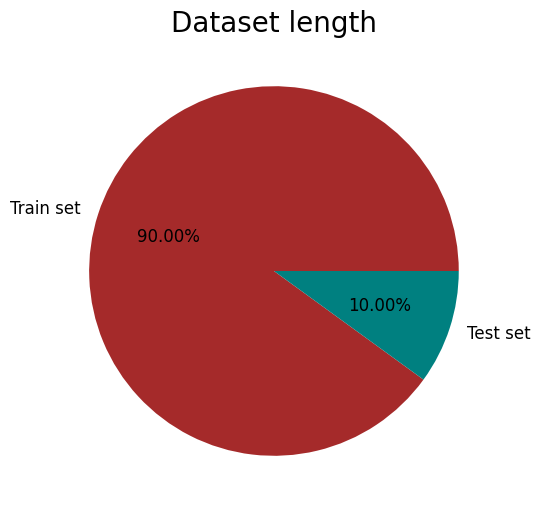

In [53]:
fig, ax = plt.subplots(figsize=(6, 6))
pie = ax.pie([len(train), len(test)],
             labels=["Train set", "Test set"],
             colors=["brown", "teal"],
             textprops={"fontsize": 12},
             autopct='%.2f%%')
ax.set_title("Dataset length", fontsize=20)
plt.show()

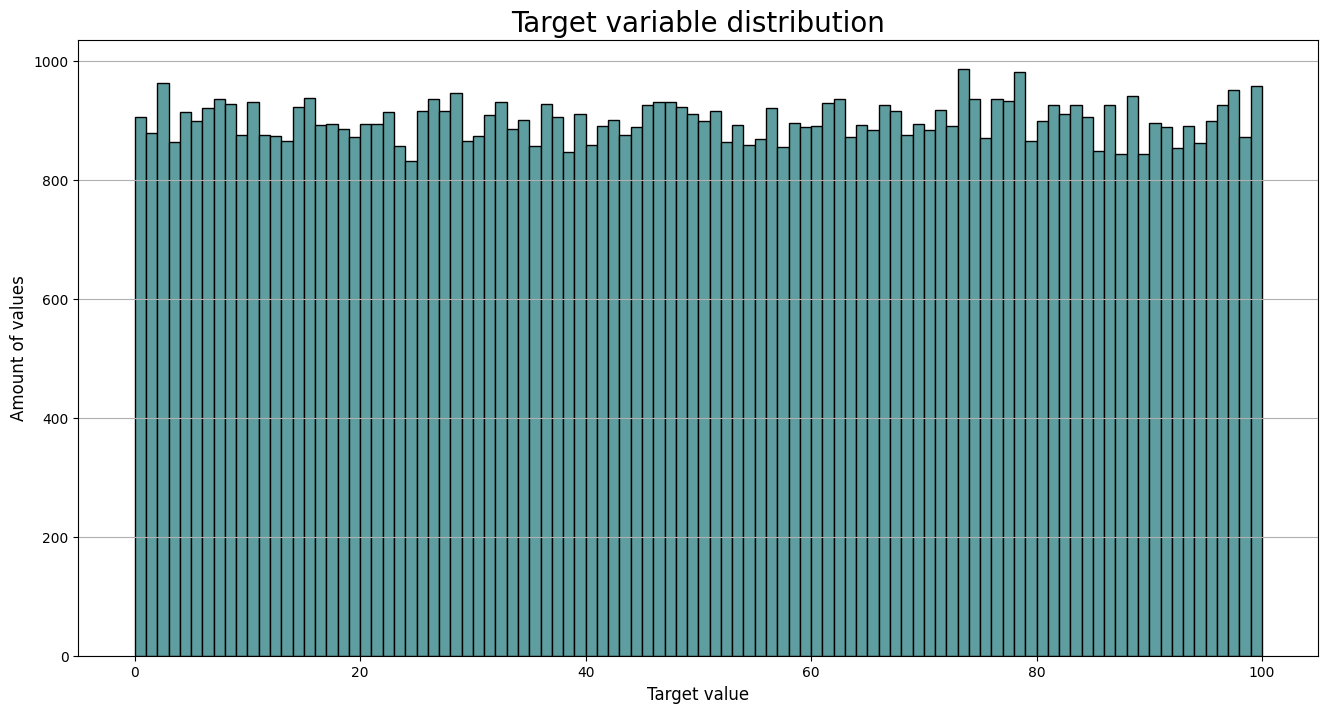

In [95]:
fig, ax = plt.subplots(figsize=(16, 8))

bars = ax.hist(train["target"],
               bins=100,
               color="cadetblue",
               edgecolor="black")
ax.set_title("Target variable distribution", fontsize=20)
ax.set_ylabel("Amount of values", fontsize=12)
ax.set_xlabel("Target value", fontsize=12)
ax.grid(axis="y")

plt.show()

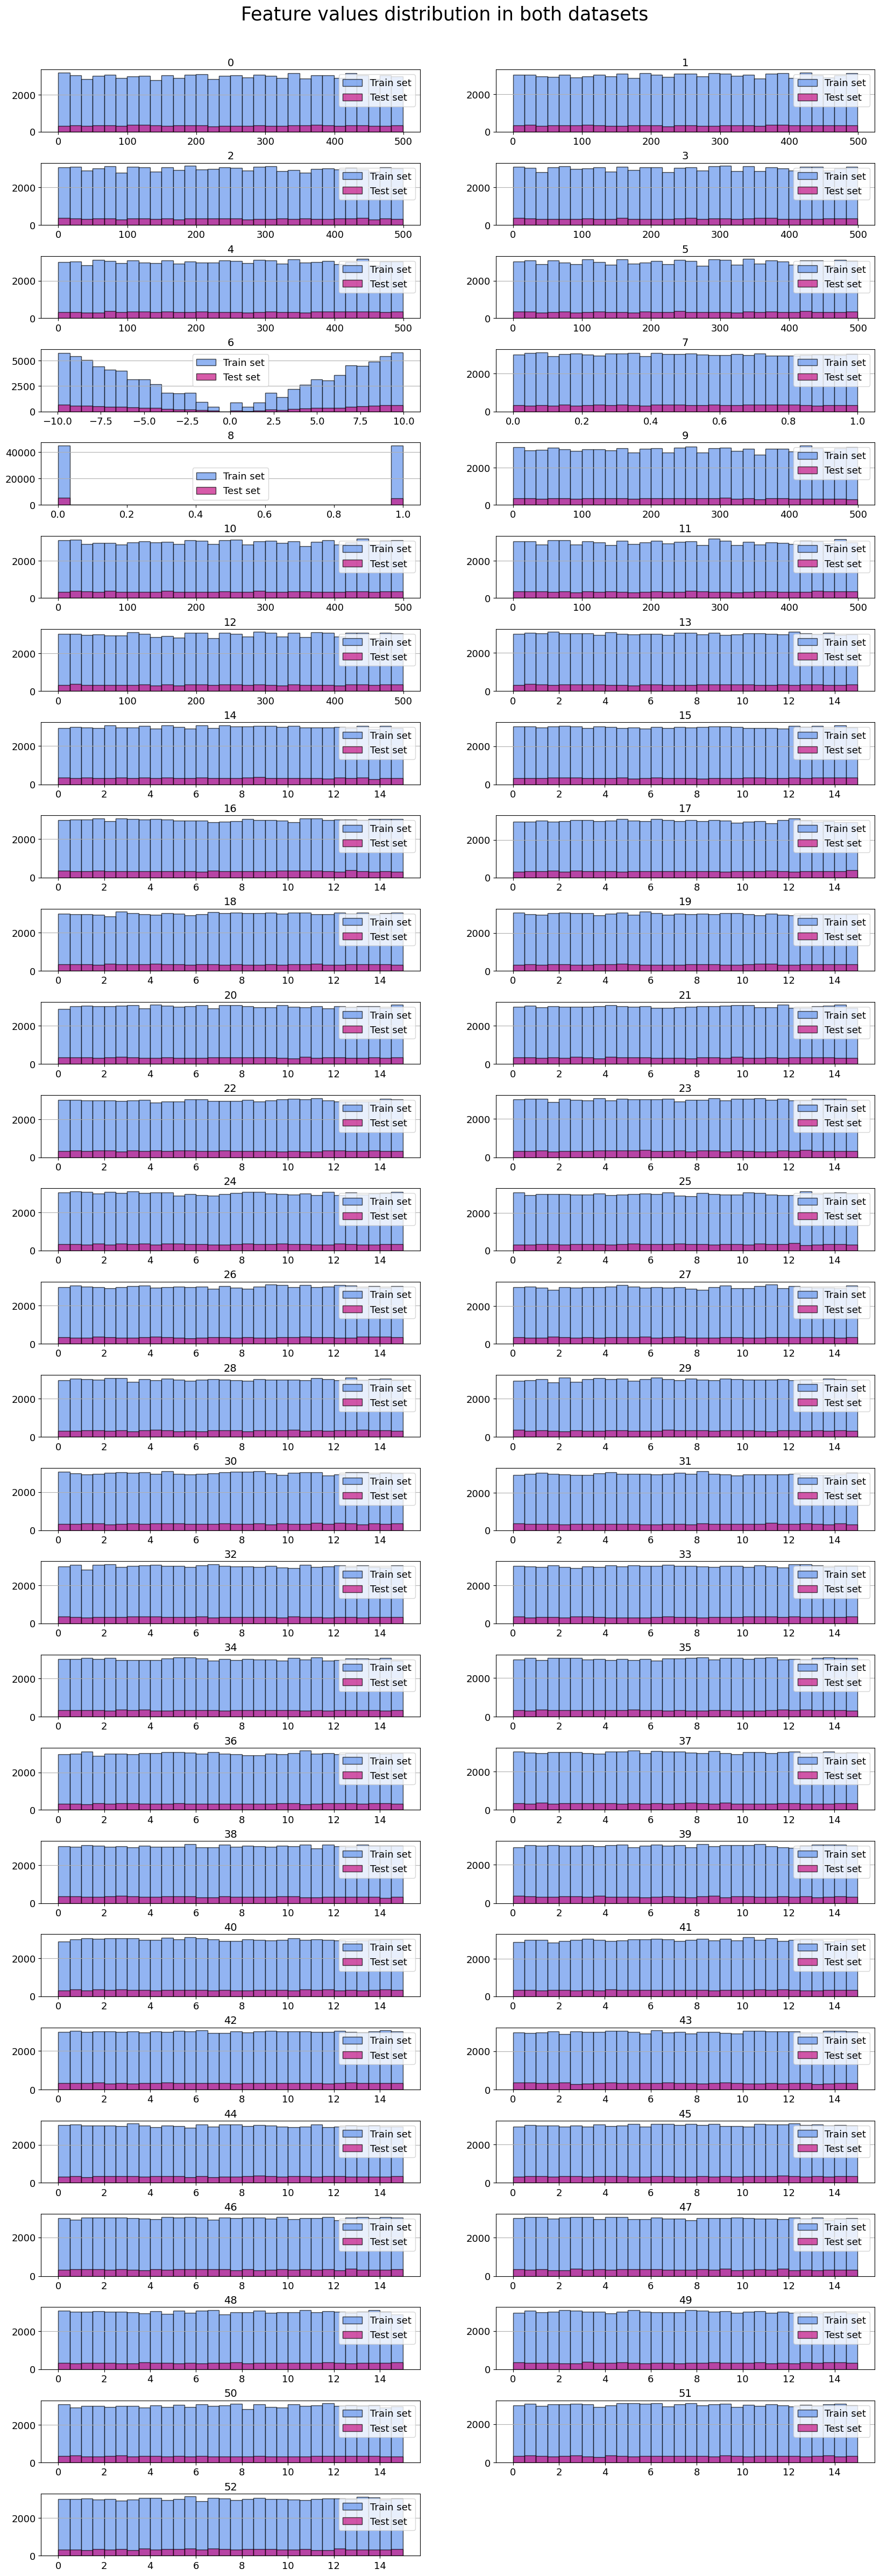

In [106]:
df = pd.concat([train.drop("target", axis=1), test], axis=0)
columns = df.columns.values

cols = 2
rows = len(columns) // cols + 1

fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(20, 60), sharex=False)

plt.subplots_adjust(hspace = 0.5)

i = 0
for r in np.arange(0, rows, 1):
    for c in np.arange(0, cols, 1):
        if i >= len(columns):
            axs[r, c].set_visible(False)
        else:
            hist1 = axs[r, c].hist(train[columns[i]].values,
                                   range=(df[columns[i]].min(),
                                          df[columns[i]].max()),
                                   bins=30,
                                   color="cornflowerblue",
                                   edgecolor="black",
                                   alpha=0.7,
                                   label="Train set")
            hist2 = axs[r, c].hist(test[columns[i]].values,
                                   range=(df[columns[i]].min(),
                                          df[columns[i]].max()),
                                   bins=30,
                                   color="mediumvioletred",
                                   edgecolor="black",
                                   alpha=0.7,
                                   label="Test set")
            axs[r, c].set_title(columns[i], fontsize=14, pad=5)
            axs[r, c].tick_params(axis="y", labelsize=13)
            axs[r, c].tick_params(axis="x", labelsize=13)
            axs[r, c].grid(axis="y")
            axs[r, c].legend(fontsize=13)
                                  
        i += 1
plt.suptitle("Feature values distribution in both datasets", y=0.9, fontsize=25)
plt.show()

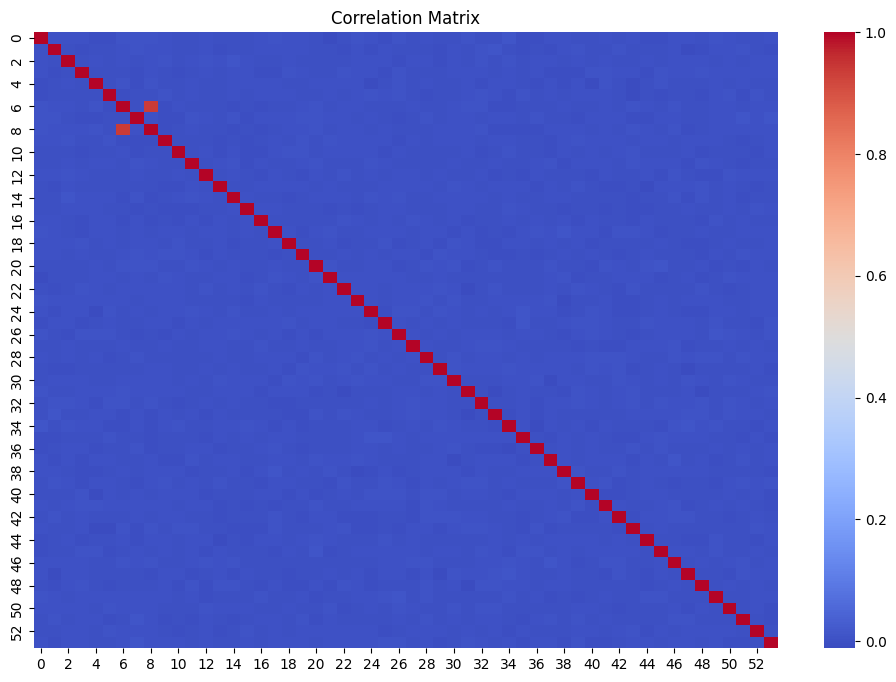

In [105]:
corr_matrix = train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

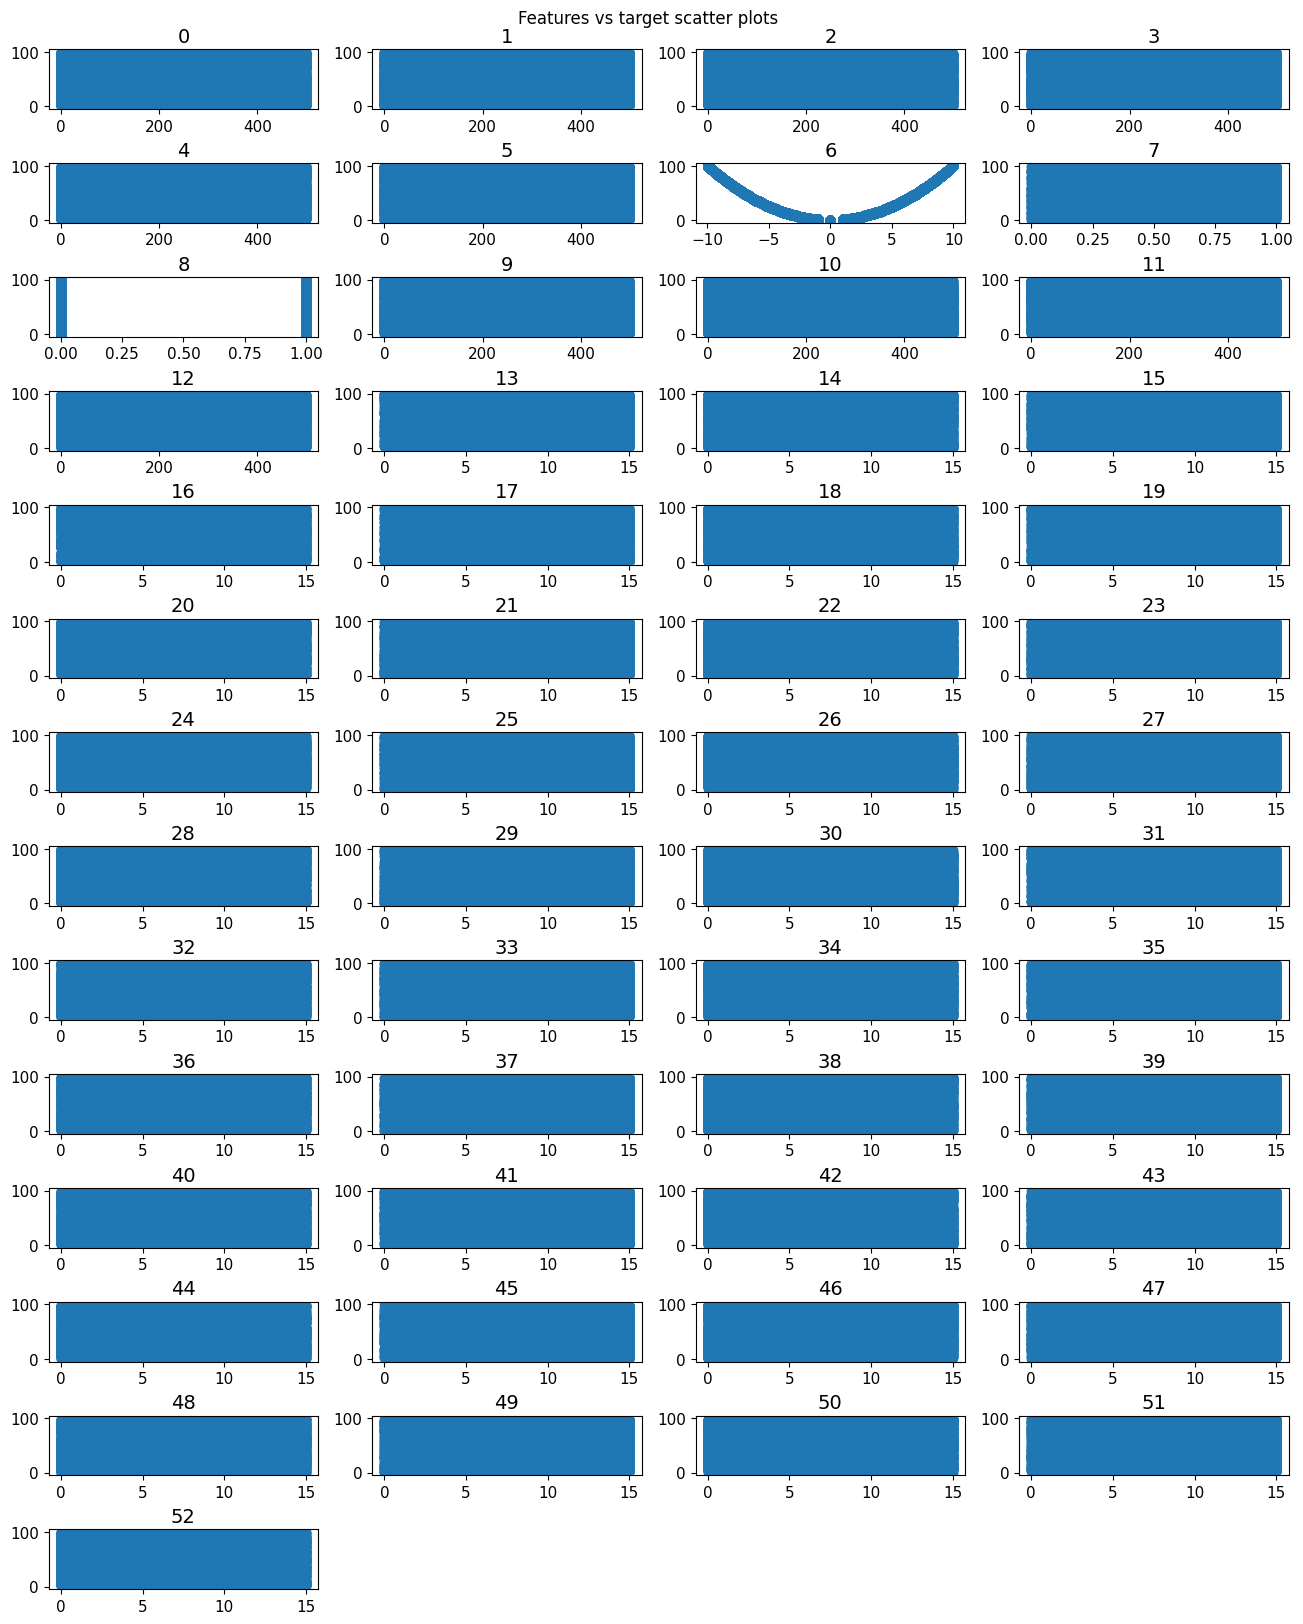

In [141]:
columns = train.drop("target", axis=1).columns.values

cols = 4
rows = len(columns) // cols + 1

fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(16,20), sharex=False)

plt.subplots_adjust(hspace = 0.9)

i=0
for r in np.arange(0, rows, 1):
    for c in np.arange(0, cols, 1):
        if i >= len(columns):
            axs[r, c].set_visible(False)
        else:
            scatter = axs[r, c].scatter(train[columns[i]].values,
                                        train["target"],)
            axs[r, c].set_title(columns[i], fontsize=14, pad=5)
            axs[r, c].tick_params(axis="y", labelsize=11)
            axs[r, c].tick_params(axis="x", labelsize=11)
                                  
        i+=1
plt.suptitle("Features vs target scatter plots", y=0.9)
plt.show()

## Observations

### - There are 0 na values both in the training and in the test data
### - The target variable follows a uniform distribution between 0 and 100
### - Feature values are distributed evenly across training and test sets
### - Most of the features show little to no correlation with the target variable
### - Feature 6 might have a strong relationship with the target variable
### - We should try several baseline models with the focus on tree-based models for this type of data

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import root_mean_squared_error
import pandas as pd

def preprocess_data(df):
    X = df.drop('target', axis=1)
    y = df['target']
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y, scaler

def train_model(X, y, model_type='random_forest'):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    if model_type == 'random_forest':
        model = RandomForestRegressor(n_estimators=100, random_state=42)
    elif model_type == 'gradient_boosting':
        model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    elif model_type == 'extra_trees':
        model = ExtraTreesRegressor(n_estimators=100, random_state=42)
    elif model_type == 'linear_regression':
        model = LinearRegression()
    elif model_type == 'svm':
        model = SVR()
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    print(f'{model_type} Validation RMSE: {rmse}')
    
    return model

X, y, scaler = preprocess_data(train)
model = train_model(X, y, model_type="extra_trees")

extra_trees Validation RMSE: 0.002073948666908791


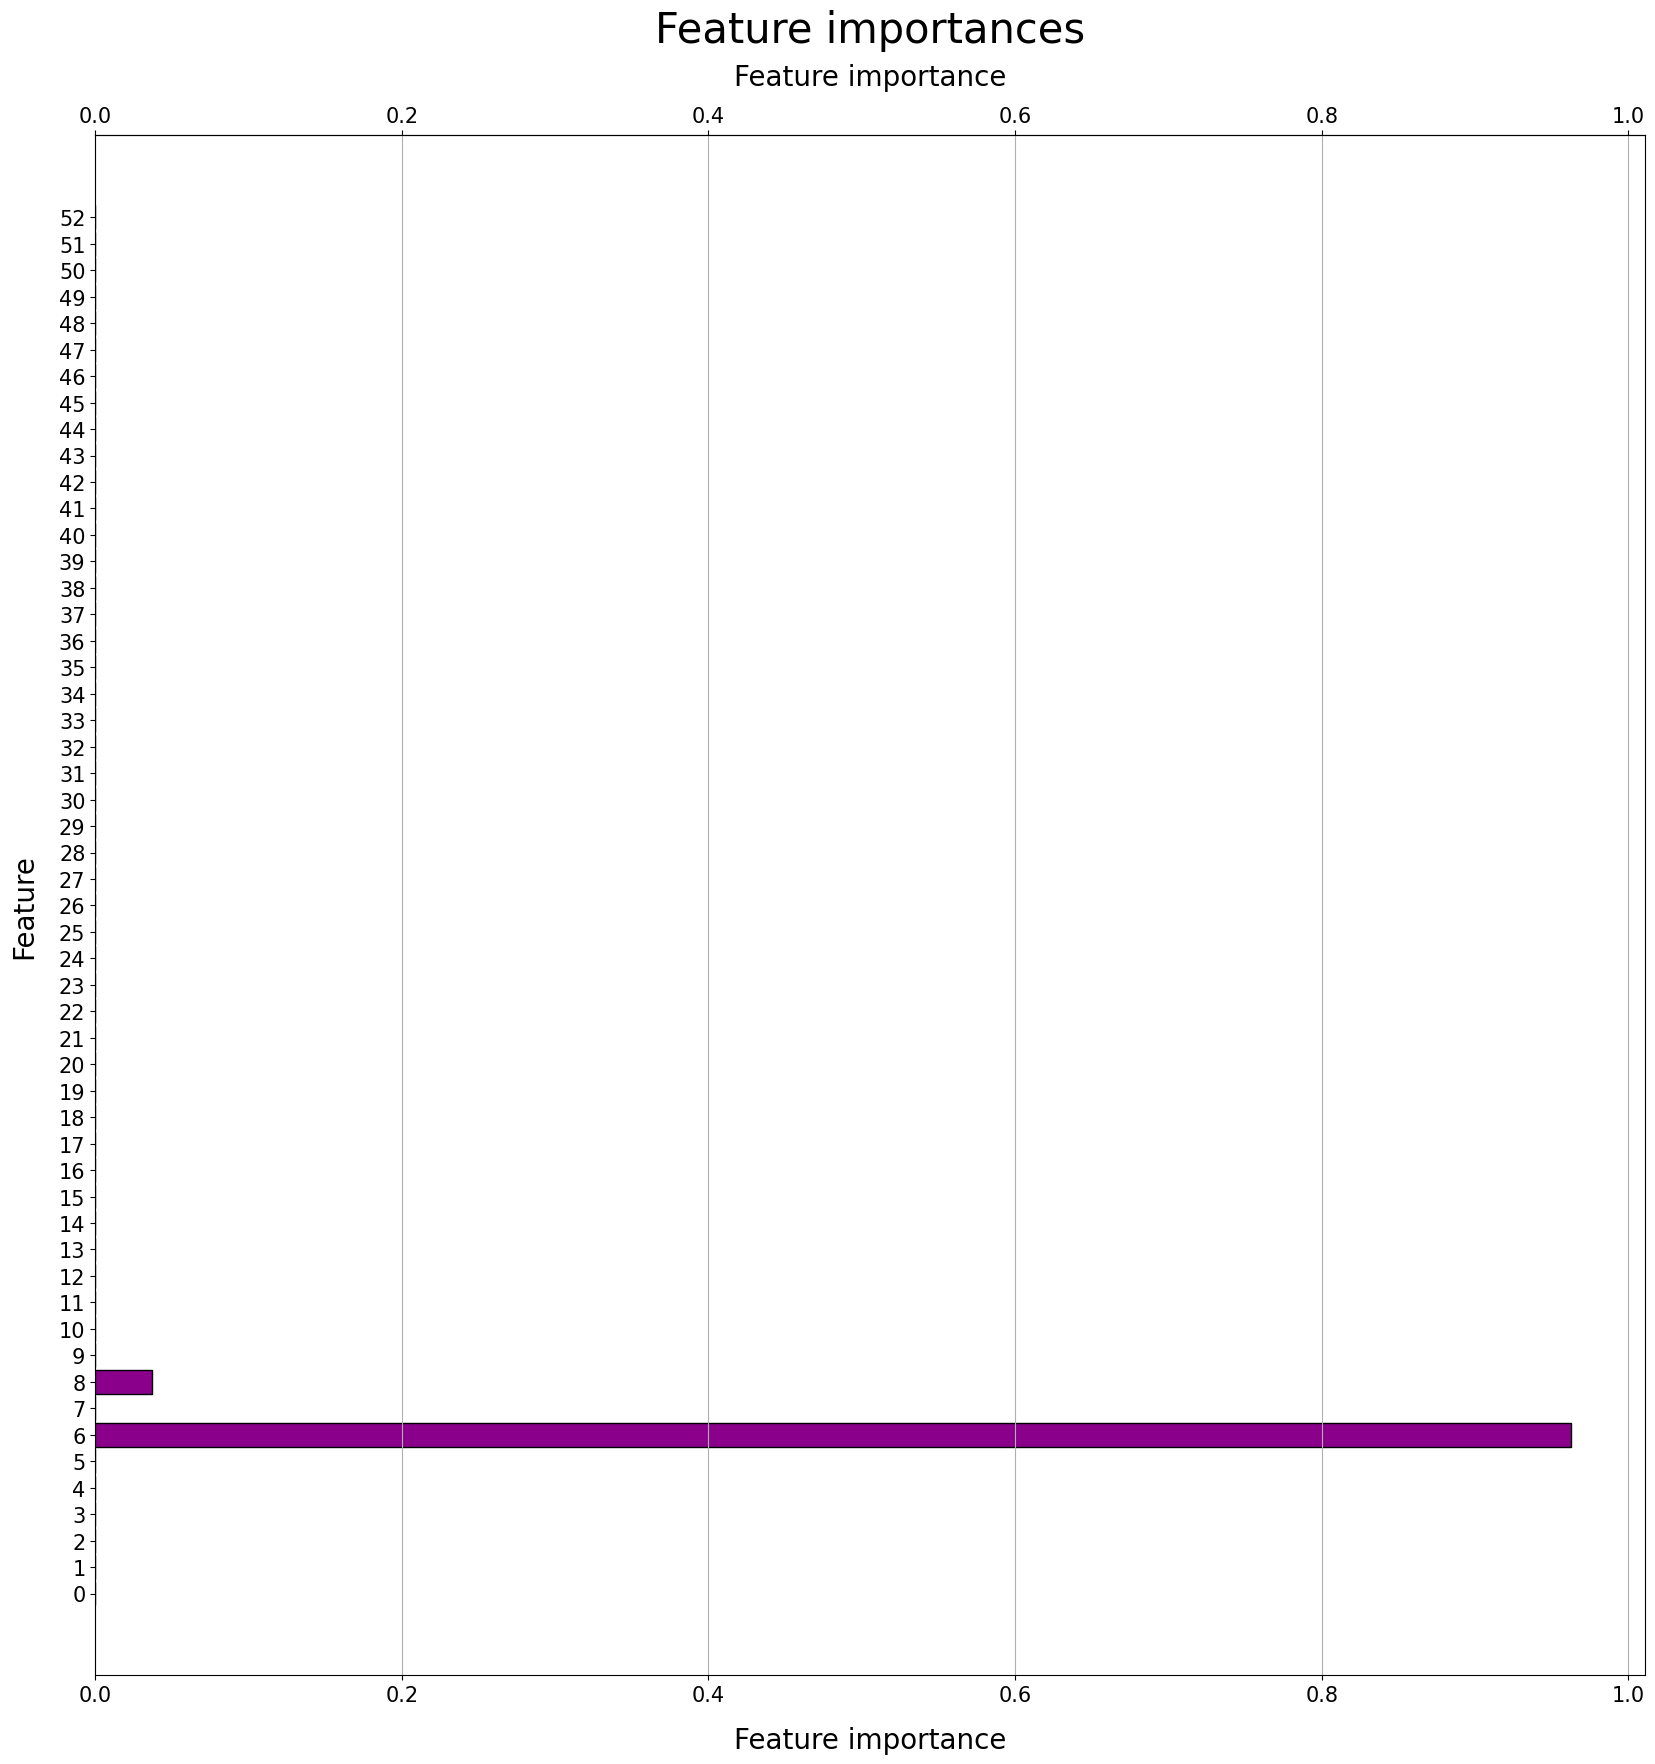

In [139]:
features = train.drop("target", axis=1).columns
importances = model.feature_importances_

fig, ax = plt.subplots(figsize=(20, 20))
bars = ax.barh(features, importances, height=0.9,
               color="darkmagenta", edgecolor="black")
ax.set_title("Feature importances", fontsize=30, pad=15)
ax.set_ylabel("Feature", fontsize=20, labelpad=15)
ax.set_xlabel("Feature importance", fontsize=20, labelpad=15)
ax.set_yticks(features)
ax.set_yticklabels(features, fontsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.grid(axis="x")
# Adding labels on top
ax2 = ax.secondary_xaxis('top')
ax2.set_xlabel("Feature importance", fontsize=20, labelpad=15)
ax2.tick_params(axis="x", labelsize=15)

### Indeed, the model almost single-handedly used feature 6 to learn the objective function.